this notebook checks the ratio of indexing funding acknowledgement in certain journals which those journals have funding from 2008

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
file_path = '../../data/NationalFunding/Data/RobustCheck/Data_lili_funding.xlsx'

In [3]:
df = pd.read_excel(file_path, names=['journal','year','type','value'])

In [4]:
year_counts = df[(df.type=='FUNDED')].groupby('journal')['year'].unique().reset_index()
year_counts['num_year'] = year_counts['year'].apply(lambda x:len(x))

select_journal = year_counts[year_counts.num_year==15].journal.tolist()

In [5]:
df_filter = df[df.journal.isin(select_journal)]

In [6]:
df_filter = df_filter.pivot_table(index=['journal','year'],columns='type',values='value').reset_index()

In [7]:
df_filter['ratio'] = df_filter['FUNDED']/df_filter['ALL']

In [8]:
pubs_path="../../data/NationalFunding/Data/DerivedData/CleanedRawData/pub.pkl"

In [9]:
pub_df = pd.read_pickle(pubs_path)
pub_df.head()

,id,year,dis,type,author,funder,author_distinct,funder_distinct,funded,IntCol,cofund,intfund
0,60694041,2017,9,1,"[Canada, United States]","[United States, United States]","[Canada, United States]",[United States],1,1,0,0
1,48573156,2012,89,1,[France],Not-Funded,[France],Not-Funded,0,0,0,0
2,55323671,2015,89,1,"[France, Chile]","[Chile, Chile, Chile, Chile, Chile]","[France, Chile]",[Chile],1,1,0,0
3,57633115,2016,31,1,"[Switzerland, United States]",[Switzerland],"[Switzerland, United States]",[Switzerland],1,1,0,0
4,64831413,2018,99,1,[China],"[China, China, China, China, China, China]",[China],[China],1,0,0,0


In [10]:
fund_year = pub_df.replace(to_replace={'funded':{1:'funded',0:'not'}}).groupby(['year','funded']).size()
fund_year = fund_year.reset_index().rename(columns={0:'count'}).pivot(index='year',columns='funded',values='count').reset_index()
fund_year['all'] = fund_year['funded']+fund_year['not']
fund_year['ratio'] = fund_year['funded']/fund_year['all']

In [11]:
fund_year

funded,year,funded,not,all,ratio
0,2009,497411,544713,1042124,0.477305
1,2010,592070,485893,1077963,0.549249
2,2011,672839,473595,1146434,0.586897
3,2012,725358,484716,1210074,0.599433
4,2013,780975,496850,1277825,0.611175
5,2014,817982,499560,1317542,0.620839
6,2015,864230,495769,1359999,0.635464
7,2016,884594,518768,1403362,0.630339
8,2017,920516,495713,1416229,0.649977
9,2018,980965,526613,1507578,0.650689


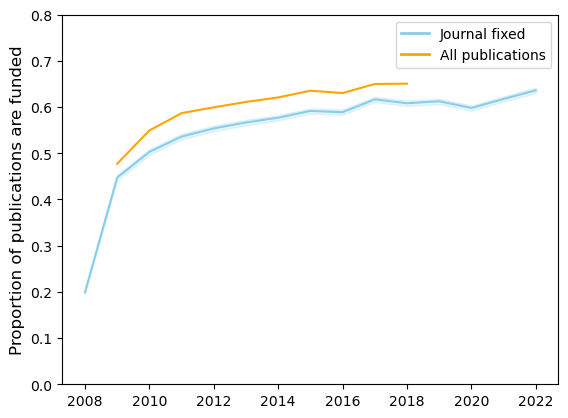

In [73]:
fig, ax=plt.subplots()
sns.lineplot(x='year',y='ratio', data=df_filter, ax=ax, color='skyblue')
sns.lineplot(x='year', y='ratio', data=fund_year, ax=ax, color='orange')
ax.set_ylim(0,0.8)
ax.set_xlabel("")
ax.set_ylabel("Proportion of publications are funded",fontsize=12)
custom_lines = [Line2D([0], [0], color='skyblue', lw=2, label='Journal fixed'),
                Line2D([0], [0], color='orange', lw=2, label='All publications')]
ax.legend(handles=custom_lines)
plt.savefig('../../data/NationalFunding/Figs/Figs/funding_ratio_journal_fixed.pdf')